project by sp bhasker

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Zomato data .csv to Zomato data .csv


In [ ]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
def handleRate(value):
  value=str(value).split("/")
  value=value[0];
  return float(value)
  dataframe["rate"]=dataframe["rate"].apply(handleRate)
  print(dataframe.head())

In [ ]:
  dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


plt.figure(figsize=(10, 6))
dataframe['listed_in(type)'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title("Distribution of Restaurant Types")
plt.show()

In [ ]:
#max votes

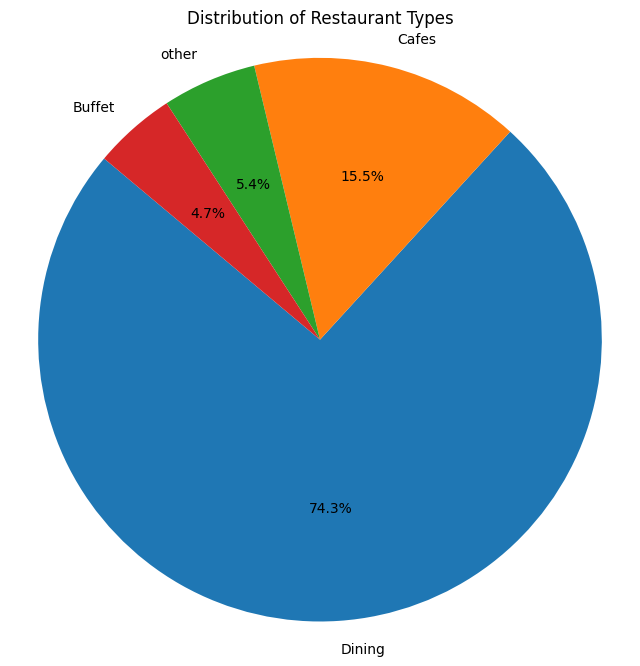

In [ ]:
restaurant_counts = dataframe['listed_in(type)'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(restaurant_counts, labels=restaurant_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Restaurant Types')
plt.axis('equal')
plt.show()

In [ ]:
max_votes=dataframe["votes"].max()
restaurent_max_votes=dataframe[dataframe["votes"]==max_votes]
print(restaurent_max_votes)
print("restdent with max votes")

                 name online_order book_table   rate  votes  \
38  Empire Restaurant          Yes         No  4.4/5   4884   

    approx_cost(for two people) listed_in(type)  
38                          750           other  
restdent with max votes


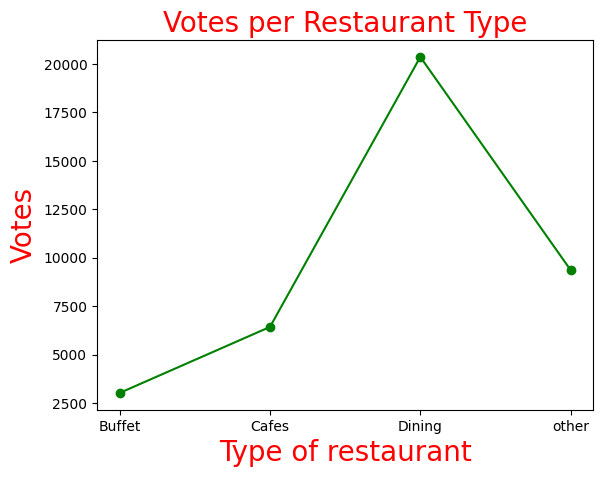

In [ ]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)
plt.title("Votes per Restaurant Type", c="red", size=20)
plt.show()

<Axes: xlabel='online_order', ylabel='count'>

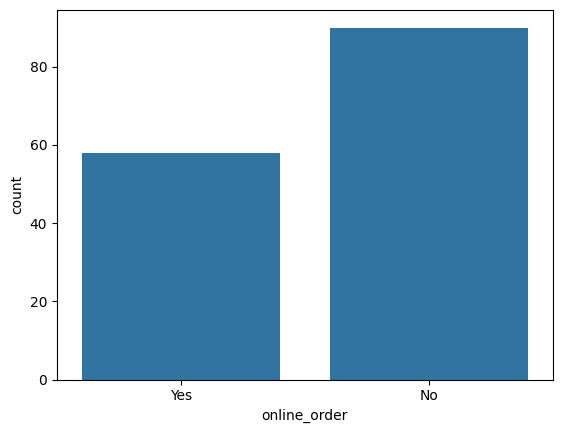

In [ ]:
#online order
sns.countplot(x="online_order",data=dataframe)

In [ ]:
#rate

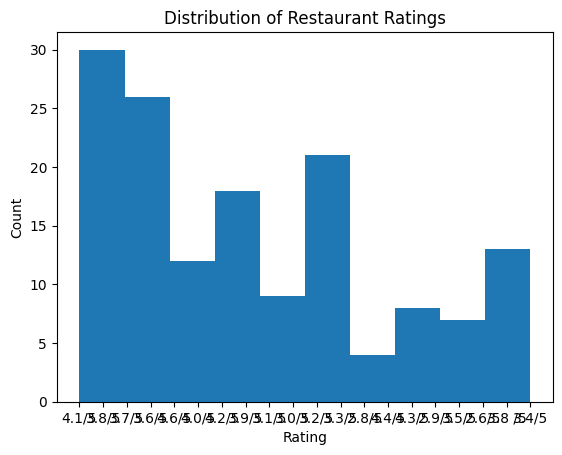

In [ ]:
plt.hist(dataframe['rate'], bins=10)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

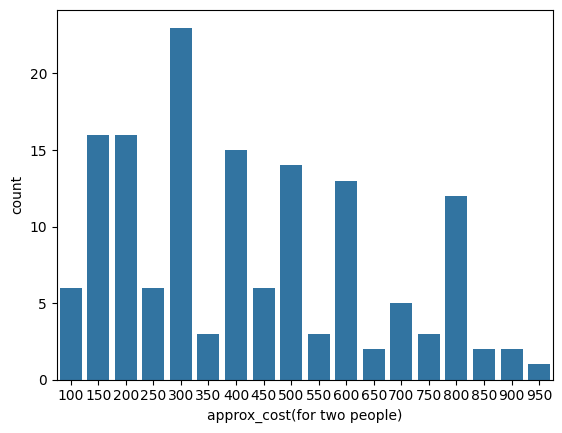

In [ ]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

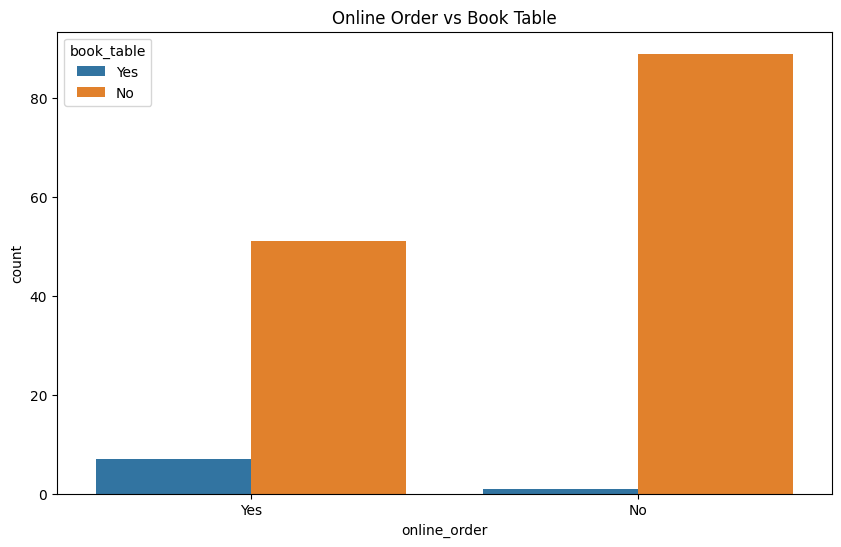

In [ ]:
#online vs offline
plt.figure(figsize=(10, 6))
sns.countplot(x="online_order", hue="book_table", data=dataframe)
plt.title("Online Order vs Book Table")
plt.show()

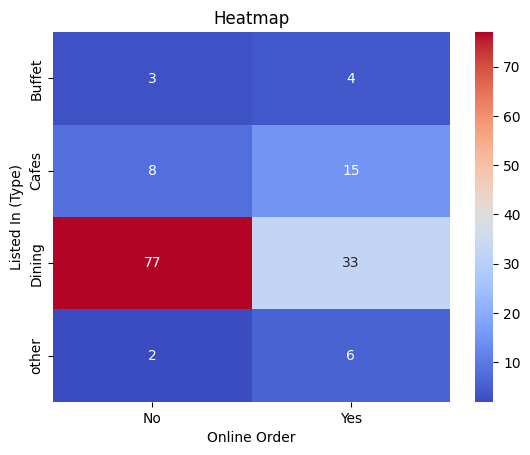

In [ ]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.

<Axes: xlabel='online_order', ylabel='rate'>

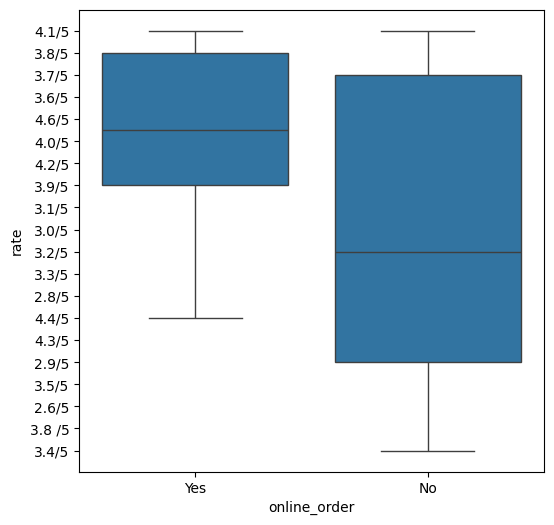

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')  # Annotate with the count values, use 'YlGnBu' colormap
plt.title("Heatmap of Restaurant Types vs Online Ordering")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.